# Sections

This section reviews more advanced functionality for creating and manipulating `pystrat.Section` objects and plotting stratigraphic sections.

The example data utilized here comes from the references listed at the end of the guide.

The example data files used in this guide can be found [here](https://github.com/pystrat-maintainers/pystrat/tree/main/docs/example-data).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pystrat

## Group, Formation, Member Labels

Intervals of stratigraphy can be labeled according to their classification within groups, formations, members, etc. Doing so requires specifying the names of these groupings as additional columns in the section spreadsheet. Every bed in the section must have a label in the relevant column. Intervals with shared labels will be labeled together. Furthermore, arbitrarily many levels can be simultaneously labeled, i.e., it is possible to label groups, formations, and members simultaneously. 

Labels are provided as an array of strings given to [`pystrat.Section`](api/pystrat.rst#pystrat.pystrat.Section). The order in which labels appear is set by the order of the columns in the array containing the labels.

In [2]:
# read in lithostratigraphy data
litho_df = pd.read_csv('example-data/lithostratigraphy.csv')

# create a pystrat Section from the lithostratigraphy data
section_1 = pystrat.Section(litho_df['THICKNESS'],                         # unit thicknesses
                            litho_df['FACIES'],                            # unit facies
                            units=litho_df[['GROUP', 'FORMATION']].values) # group and formation names

Create a `pystrat.Style` to plot the section.

In [3]:
style_df = pd.read_csv('example-data/style.csv')
style_1 = pystrat.Style(style_df['facies'],                  # labels (must include all unique facies)
                        style_df[['R','G','B']]/255,         # colors 
                        style_df['width'],                   # widths 
                        swatch_values=style_df['swatch'])    # swatches

Plot the section, now using the `label_units=True` and `unit_label_wid_tot=0.3` arguments. 

The `unit_label_wid_tot` parameter specifies the horizontal fraction of the axis that is used for the unit interval labels; increase this if the labels are too cramped.

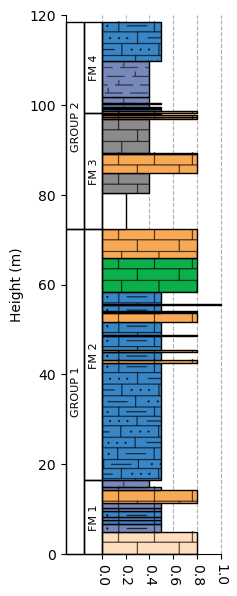

In [4]:
fig = plt.figure(figsize=(2, 7))
ax = plt.axes(ylim=[0, 120])   
section_1.plot(style_1, ax=ax, label_units=True, unit_label_wid_tot=0.3)
plt.show()

## Annotations

Plotting annotations alongside stratigraphic columns is a conventional way of illustrating observations at given heights within the section, and `pystrat` is capable of plotting annotations.

Annotations must be added to the `pystrat.Section` object as a `pandas.DataFrame`. This DataFrame must contain *height* and *annotation* columns:
1. The *height* column contains the stratigraphic heights at which to plot the annotations.
2. The *annotation* column contains the names of annotations that are mapped to `.png` graphics which are plotted as annotations.

In [5]:
ann = pd.read_csv('example-data/annotations.csv')
ann

,height,annotation
0,62.0,stromatolite
1,89.2,stromatolite


In [6]:
section_2 = pystrat.Section(litho_df['THICKNESS'],                           # unit thicknesses
                            litho_df['FACIES'],                              # unit facies
                            units=litho_df[['GROUP', 'FORMATION']].values,   # group and formation names
                            annotations=ann)                                 # add annotations 

### Default Annotations

The mapping between annotations and graphics is specified in a `pystrat.Style` object. 

There are a couple ways of specifying which annotations to plot. `pystrat` comes with a small library of annotation illustrations. The available annotations can be visualized with `pystrat.Style.plot_default_annotations()`.

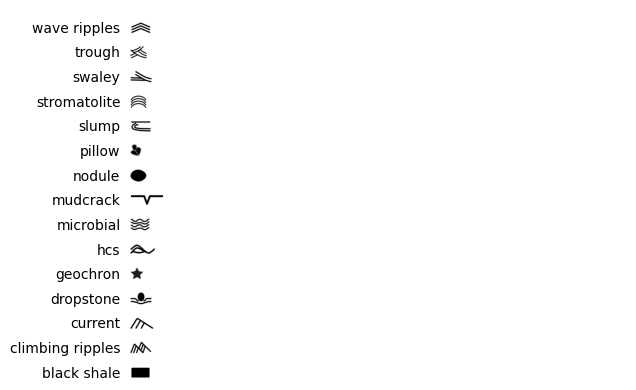

In [7]:
pystrat.Style.plot_default_annotations()

In the section above, only stromatolites need to be annotated. A `Style` object with stromatolite annotations can be initialized by passing the `annotations=['stromatolite']` parameter.

In [8]:
style_2 = pystrat.Style(style_df['facies'],                  # labels (must include all unique facies)
                        style_df[['R','G','B']]/255,         # colors 
                        style_df['width'],                   # widths 
                        swatch_values=style_df['swatch'],    # swatches
                        annotations=['stromatolite'])        # annotations

Now, the section can be plotted with annotations at the desired heights.

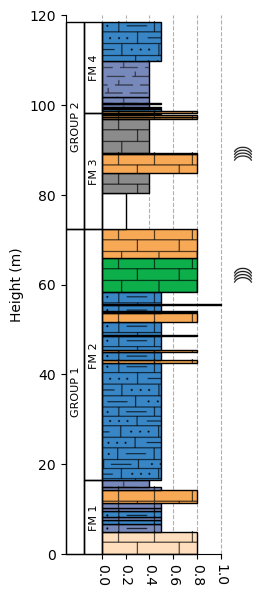

In [9]:
fig = plt.figure(figsize=(2, 7))
ax = plt.axes(ylim=[0, 120])   
section_2.plot(style_2, ax=ax, label_units=True, unit_label_wid_tot=0.3)
plt.show()

### Custom Annotations

If an annotation is not available in the default library, custom graphics can be used by providing a dictionary that maps annotation names to `.png` paths.

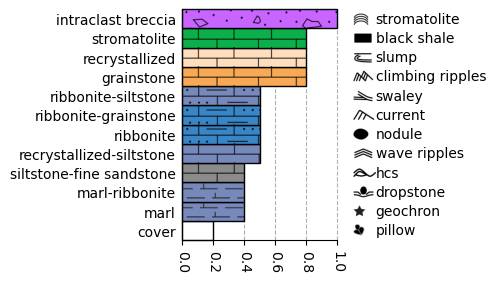

In [10]:
ann_paths_df = pd.read_csv('example-data/annotation_paths.csv')
ann_paths_dict = dict(zip(ann_paths_df['name'], ann_paths_df['path']))
style_3 = pystrat.Style(style_df['facies'],                  # labels (must include all unique facies)
                        style_df[['R','G','B']]/255,         # colors 
                        style_df['width'],                   # widths 
                        swatch_values=style_df['swatch'],    # swatches
                        annotations=ann_paths_dict)          # annotations

fig, ax = plt.subplots(1, 1, figsize=(2, 3))
style_3.plot_legend(ax=ax)

### Annotation Size

The size of the annotations can be controlled by the `annotation_height` parameter, which sets the annotation height in inches. 

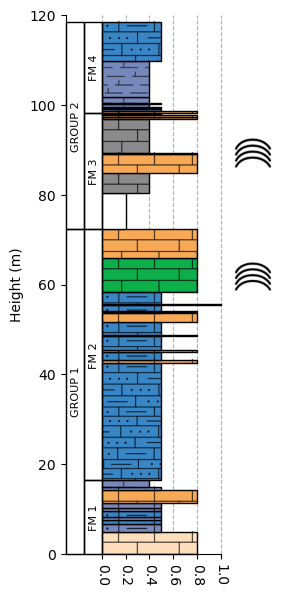

In [11]:
fig = plt.figure(figsize=(2, 7))
ax = plt.axes(ylim=[0, 120])   
section_2.plot(style_2, ax=ax, label_units=True, unit_label_wid_tot=0.3, annotation_height=0.3)
plt.show()

## Style Compatibility

It is possible to check the compatibility of a `pystrat.Section` with a `pystrat.Style`.

Use the [`pystrat.Section.style_compatibility`](api/pystrat.rst#pystrat.pystrat.Section.style_compatibility) function. 

This function checks that all facies present in the section are defined within the style object. If the section and the style object both have annotations, it will also check that the annotations in the section are defined in the style object. 

In [12]:
section_2.style_compatibility(style_2)

True

If the style object does not have annotations but the facies are well-defined, then the check will pass and annotations wouldn't be plotted.

In [13]:
section_2.style_compatibility(style_1)

True

## Stratigraphic Data

`pystrat` allows adding other types of data to `pystrat.Section` objects. There are three different types of data:
1. facies attributes: These data are defined on a per-bed basis; there must be one entry per bed in the section
2. data attributes: These data are defined at stratigraphic heights and are not explicitly tied to particular beds
3. generic attributes: These data are not tied to specific beds or stratigraphic height and instead describe other aspects of the section.

### Facies Attributes

Facies attributes are added to a section object with `pystrat.Section.add_facies_attribute`:

In [14]:
section_1.add_facies_attribute('lithology', litho_df['LITHOLOGY'])

Once added, the attributes can be accessed as any other attribute.

In [15]:
section_1.lithology

array(['dolomite', 'dolomite', 'dolomite', 'dolomite', 'dolomite',
       'dolomite', 'dolomite', 'dolomite', 'dolomite', 'marl', 'dolomite',
       'dolomite', 'dolomite', 'dolomite', 'dolomite', 'dolomite',
       'dolomite', 'dolomite', 'dolomite', 'dolomite', 'dolomite',
       'dolomite', 'dolomite', 'dolomite', 'dolomite', 'cover',
       'siliciclastic', 'dolomite', 'dolomite', 'siliciclastic',
       'dolomite', 'dolomite', 'dolomite', 'marl', 'dolomite', 'dolomite',
       'limestone', 'marl', 'limestone', 'marl', 'limestone', 'marl',
       'marl', 'limestone'], dtype=object)

A dataframe representing the current state of the section object can be returned with `pystrat.Section.return_facies_dataframe`:

In [16]:
section_1.return_facies_dataframe().head()

,unit_number,thicknesses,base_height,top_height,facies,lithology
0,0,4.9,0.0,4.9,recrystallized,dolomite
1,1,1.8,4.9,6.7,ribbonite-siltstone,dolomite
2,2,0.8,6.7,7.5,ribbonite,dolomite
3,3,0.7,7.5,8.2,ribbonite-siltstone,dolomite
4,4,1.4,8.2,9.6,ribbonite,dolomite


### Data Attributes

Data attributes refer to stratigraphic observations that are not uniquely tied to beds in the stratigraphy. `pystrat` handles these data with the [`pystrat.Section.Data`](api/pystrat.rst#pystrat.pystrat.Section.Data) subclass.

This example uses carbonate chemostratigraphy.

In [17]:
chemo = pd.read_csv('example-data/chemostratigraphy.csv')
chemo.head()

,CARB_SAMPLE,CARB_HEIGHT,CARB_d13C,CARB_d18O,CARB_87Sr/86Sr,CARB_Al_ppm,CARB_Ca_ppm,CARB_Fe_ppm,CARB_Mg_ppm,CARB_Mn_ppm,CARB_Sr_ppm
0,T46-1.2,1.2,1.820429,0.130692,NaN,682.46931,313906.3927,293.408791,197499.6646,443.552746,539.226752
1,T46-2.1,2.1,1.597633,0.134841,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,T46-3.8,3.8,0.102096,-0.195867,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,T46-5.9,5.9,1.090520,-1.066232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,T46-7.1,7.1,2.194324,-0.630248,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Add the $\delta^{13}$C data using the `pystrat.Section.add_data_attribute()` method:

In [18]:
section_1.add_data_attribute('d13C', chemo['CARB_HEIGHT'], chemo['CARB_d13C'])

This creates an instance of `pystrat.Section.Data`. It is possible to add attributes to these objects as well. For example, add the the sample names for the $\delta^{13}$C as follows:

In [19]:
section_1.d13C.add_height_attribute('sample', chemo['CARB_SAMPLE'])

Data can be returned as a DataFrame with `pystrat.Section.Data.return_data_dataframe()`:

In [20]:
section_1.d13C.return_data_dataframe().head()

,height,values,sample
0,1.2,1.820429,T46-1.2
1,2.1,1.597633,T46-2.1
2,3.8,0.102096,T46-3.8
3,5.9,1.090520,T46-5.9
4,7.1,2.194324,T46-7.1


Note that this function is defined for the `Data` sub-class and therefore acts on the `section_1.d13C` attribute in this case.

Add another data attribute, this time the $\delta^{18}$O measurements.

In [21]:
# d18O
section_1.add_data_attribute('d18O', chemo['CARB_HEIGHT'], chemo['CARB_d18O'])
section_1.d18O.add_height_attribute('sample', chemo['CARB_SAMPLE'])

All data attributes that have been added can be listed:

In [22]:
section_1.data_attributes

['d13C', 'd18O']

#### Data Attribute Plotting

Data attributes can be plotted by directly accessing them from the section object. Alternatively, `pystrat` also provides [`pystrat.Section.plot_data_attribute`](api/pystrat.rst#pystrat.pystrat.Section.plot_data_attribute):

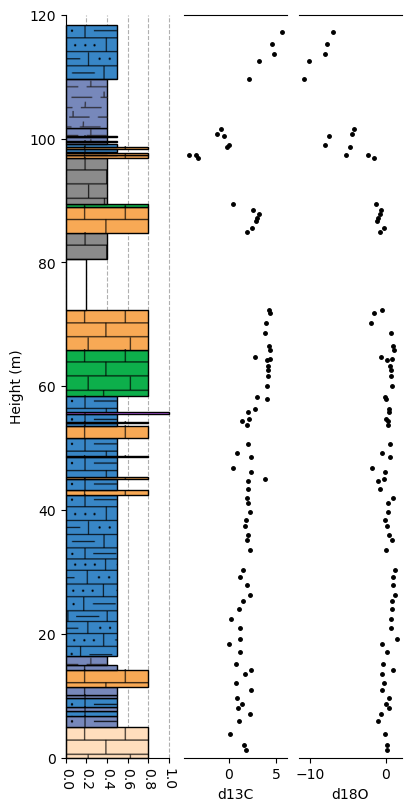

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(4, 8), sharey=True, constrained_layout=True)
ax[0].set_ylim([0, 120]) # remember to set y limits!

section_1.plot(style_1, ax=ax[0])

# plot data attributes
section_1.plot_data_attribute('d13C', ax=ax[1])
section_1.plot_data_attribute('d18O', ax=ax[2])

plt.show()

### Generic Attributes

Generic attributes are not tied to specific beds or stratigraphic heights and instead describe other aspects of a section.

They are added with `pystrat.Section.add_generic_attribute`:

In [24]:
section_1.add_generic_attribute('locality', 'West Samre')
section_1.locality

'West Samre'

## Helper Functions and Attributes

The `pystrat.Section` class also provides various helpful functions and attributes relevant to stratigraphic sections.

### Units at Heights

Use `pystrat.Section.get_units()` to return the unit(s) at given stratigraphic height(s). 

In [25]:
section_1.get_units(np.array([50, 100]))

array([['GROUP 1', 'FM 2'],
       ['GROUP 2', 'FM 4']], dtype=object)

### Total Thickness

Use `pystrat.Section.total_thickness` to return the total thickness of the section.

In [26]:
section_1.total_thickness

118.4

### Unique Facies

Use `pystrat.Section.unique_facies` to return the unique facies in the section.

In [27]:
section_1.unique_facies

array(['cover', 'grainstone', 'intraclast breccia', 'marl',
       'marl-ribbonite', 'recrystallized', 'recrystallized-siltstone',
       'ribbonite', 'ribbonite-grainstone', 'ribbonite-siltstone',
       'siltstone-fine sandstone', 'stromatolite'], dtype=object)

## References

> Swanson-Hysell, N.L., Maloof, A.C., Condon, D.J., Jenkin, G.R., Alene, M., Tremblay, M.M., Tesema, T., Rooney, A.D., and Haileab, B., 2015, Stratigraphy and geochronology of the Tambien Group, Ethiopia: Evidence for globally synchronous carbon isotope change in the Neoproterozoic: Geology, v. 43, p. 323-326, https://doi.org/10.1130/G36347.1.

> MacLennan, S.A., Park, Y., Swanson-Hysell, N.L., Maloof, A.C., Schoene, B., Gebreslassie, M., Antilla, E., Tesema, T., Alene, M., and Haileab, B., 2018, The arc of the Snowball: U-Pb dates constrain the Islay anomaly and the initiation of the Sturtian glaciation: Geology, v. 46, p. 539-542, https://doi.org/10.1130/G40171.1.

>Park, Y., Swanson-Hysell, N.L., MacLennan, S.A., Maloof, A.C., Gebreslassie, M., Tremblay, M.M., Schoene, B., Alene, M., Anttila, E.S.C., Tesema, T., Condon, D.J., Haileab, B., 2020, The lead-up to the Sturtian Snowball Earth: Neoproterozoic chemostratigraphy time-calibrated by the Tambien Group of Ethiopia: GSA Bulletin, vol. 132, pp. 1119–1149, https://doi.org/10.1130/B35178.1